<h1>Activity 2 - UK ROAD ACCIDENTS DATA ANALYTICS</h1> 
<hr>
<h3> Data Analyst: Johnrey Mansilungan</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets\\uk_road_accident.csv')
data

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h2>Descriptive Analysis</h2>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660679.0,1.357040,0.824847,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660679.0,1.831255,0.715269,1.000000,1.000000,2.000000,2.000000,32.000000


<h2>Finding missing datas</h2>

In [5]:
data.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h2>Filling up missing datas</h2>

In [6]:
data['Latitude'] = data['Latitude'].fillna(data['Latitude'].mean())
data['Longitude'] = data['Longitude'].fillna(data['Longitude'].mean())
data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].fillna(data['Road_Surface_Conditions'].mode()[0])
data['Road_Type'] = data['Road_Type'].fillna(data['Road_Type'].mode()[0])
data['Urban_or_Rural_Area'] = data['Urban_or_Rural_Area'].fillna(data['Urban_or_Rural_Area'].mode()[0])
data['Weather_Conditions'] = data['Weather_Conditions'].fillna(data['Weather_Conditions'].mode()[0])
data.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>Changing data types</h2>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [8]:
data['Index'] = data['Index'].astype('category')
data['Accident_Severity'] = data['Accident_Severity'].astype('category')
#data['Accident Date'] = data['Accident Date'].astype('category')

#CLEANING UP DATE
data['Accident Date'] = data['Accident Date'].astype(str)
data['Accident Date'].replace('/', '-')
data['Accident Date'].str.strip()

data['Accident Date'] = pd.to_datetime(data['Accident Date'], dayfirst= True,errors='coerce' )
data['Year'] = data['Accident Date'].dt.year
data['Month'] = data['Accident Date'].dt.month
data['Day'] = data['Accident Date'].dt.day
data['DaysOfWeek'] = data['Accident Date'].dt.dayofweek


data['Light_Conditions'] = data['Light_Conditions'].astype('category')
data['District Area'] = data['District Area'].astype('category')
data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].astype('category')
data['Road_Type'] = data['Road_Type'].astype('category')
data['Urban_or_Rural_Area'] = data['Urban_or_Rural_Area'].astype('category')
data['Weather_Conditions'] = data['Weather_Conditions'].astype('category')
data['Vehicle_Type'] = data['Vehicle_Type'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            265007 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

<h2>Exploratory Data Analysis EDA</h2>

<hr>
<h3>Questions</h3>
<ol>
    <li>Which district reports the highest proportion of Fatal accidents?</li>
    <li>Does the average number of casualties differ by Road Type?</li>
    <li>Does the average number of casualties differ by accident severity?</li>
    <li>Are multi-vehicle accidents more likely to be Serious or Fatal compared to single-vehicle?</li>
    <li>Which light condition (daylight, darkness, etc.) is most associated with Fatal accidents?</li>
    <li>Which district area has the highest number of accidents overall?</li>
    <li>Which district records the highest average casualties per accident?</li>
    <li>Urban vs Rural: Are fatal accidents more common in rural areas?</li>
    <li>Which district has the highest number of Wet or damp road accidents?</li>
    <li>Which road surface condition has the highest accident rate?</li>
    <li>How does weather condition affect average casualties?</li>
    <li>Which weather + light condition combination is the riskiest?</li>
    <li>Which vehicle type is most frequently involved in accidents?</li>
    <li>Which vehicle type is most likely to crash in darkness with completely no lighting?</li>
    <li>Do fatal accidents occur at higher or lower latitudes (north vs south UK)?</li>
    <li>Do motorcycle accidents increase casualty count more in rural or urban areas?</li>
    <li>Which area has more accident? (Urban/Rural)</li>
    <li>Which districts report the highest share of icy/frost accidents?</li>
    <li>Are multi-vehicle accidents in wet weather more likely to be serious than in dry weather?</li>
    <li>Is there a correlation between number of vehicles and number of casualties?</li>
    <li>Are weekends more likely to have serious or fatal accidents compared to weekdays?</li>
    <li>Do accidents occur more frequently in winter vs summer months?</li>
</ol>

In [9]:
data

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DaysOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,6.0,5.0,2.0
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019.0,7.0,2.0,1.0
2,200701BS66127,Serious,NaT,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,NaN,NaN,NaN,NaN
3,200701BS66128,Serious,NaT,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),NaN,NaN,NaN,NaN
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,2019.0,9.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,NaT,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN
660675,201091NM01881,Slight,NaT,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN
660676,201091NM01935,Slight,NaT,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN
660677,201091NM01964,Serious,NaT,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,NaN,NaN,NaN,NaN


<h3>1. Which district reports the highest proportion of Fatal accidents?</h3>

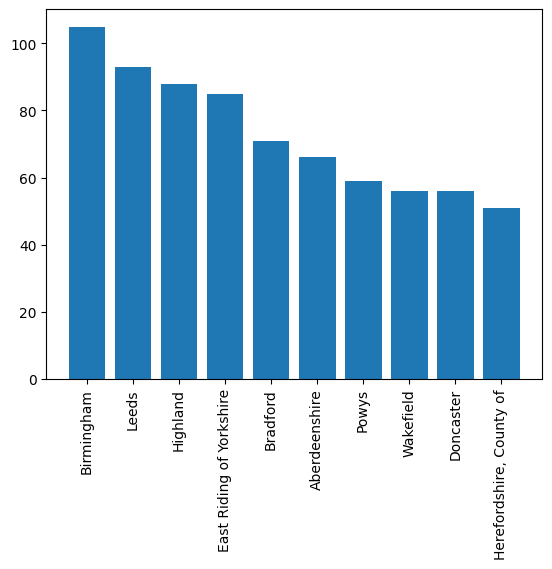

In [10]:
severity = data[data['Accident_Severity'] == 'Fatal'].groupby('District Area').size()
top_10_districts = severity.sort_values(ascending=False).head(10)

plt.bar(x = top_10_districts.index, height = top_10_districts.values)
plt.xticks(rotation=90)
plt.show()

In [11]:
mostFatal = severity.idxmax()
mostFatalCount = severity.max()
print(f"{mostFatal} - {mostFatalCount}")

Birmingham - 105


<h3>INSIGHT 1</h3>

<p>Birmingham has the highest number of reported fatal accidents with 105 compared to the other districts listed. This could be due to a number of factors, such as higher traffic volume or specific road conditions in that area</p>
<hr>

<h3>2. Does the average number of casualties differ by Road Type?</h3>

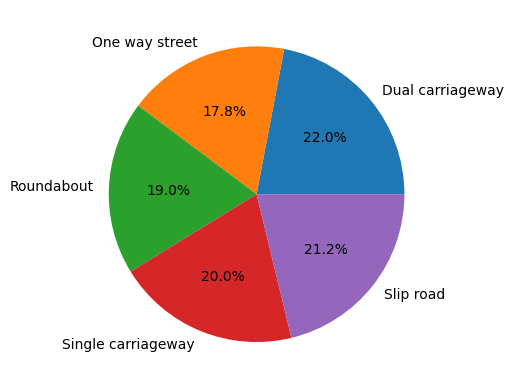

In [12]:
roadType = data.groupby('Road_Type')['Number_of_Casualties'].mean()
roadType

plt.pie(roadType, labels = roadType.index, autopct = '%1.1f%%')
plt.show()

<h3>INSIGHT 2</h3>

<p>From these averages, it seems like dual carriageways have a slightly higher average number of casualties compared to other road types, while oneway streets have the lowest. This might be because dual carriageways often have higher speed limits and more lanes</p>
<hr>

<h3>3. Does the average number of casualties differ by accident severity?</h3>

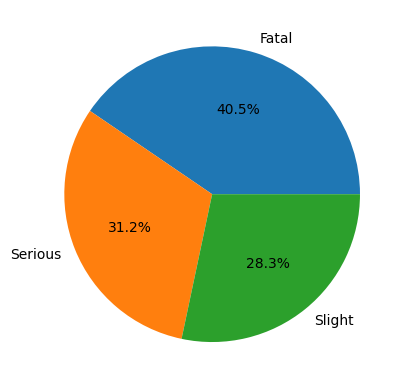

In [13]:
roadType = data.groupby('Accident_Severity')['Number_of_Casualties'].mean()
roadType

plt.pie(roadType, labels = roadType.index, autopct = '%1.1f%%')
plt.show()

<h3>INSIGHT 3</h3>

<p>The data shows that fatal accidents tend to have a higher average number of casualties compared to serious or slight accidents. This makes sense intuitively, as more severe accidents are likely to involve more people and result in more injuries or fatalities.</p>
<hr>

<h3>4. Are multi-vehicle accidents more likely to be Serious or Fatal compared to single-vehicle?</h3>

In [14]:
multiVehicle = data['Number_of_Vehicles'] >= 2
singleVehicle = !multiVehicle

multiVehicleAcc = data.groupby(multiVehicle)['Accident_Severity'].value_counts().unstack()
multiVehicleAcc
#whereas TRUE means it is a multi-vehicle accident.



Accident_Severity,Fatal,Serious,Slight
Number_of_Vehicles,,,
False,3885,38940,157962
True,4776,49277,405839


<h3>INSIGHT 4</h3>

<p>Looking at the numbers, All accdent severity accident counts are higher for multi-vehicle accidents compared to single-vehicle accidents. This suggests that multi-vehicle accidents are indeed more likely to result in serious or fatal outcomes</p>
<hr>

<h3>INSIGHT 5</h3>

<p>However, the proportion of fatal accidents is higher in single-vehicle accidents (3885/200787 ≈ 0.0193) compared to multi-vehicle accidents (4776/457035 ≈ 0.0104). This indicates that while multi-vehicle accidents have a higher number of fatalities, single-vehicle accidents are more likely to result in a fatality.</p>
<hr>

<h3>5. Which light condition (daylight, darkness, etc.) is most associated with Fatal accidents?</h3>

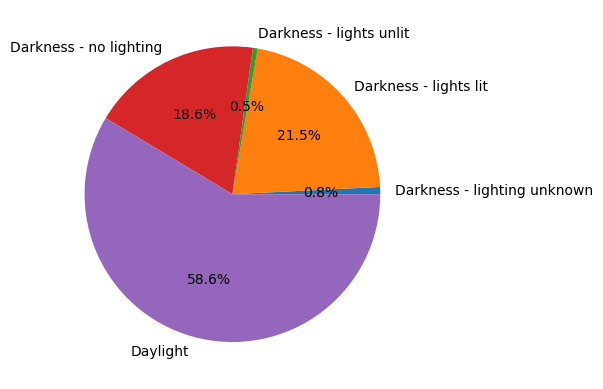

In [15]:
lightCond = data[data['Accident_Severity']== 'Fatal'].groupby('Light_Conditions').size()
lightCond

plt.pie(lightCond, labels = lightCond.index, autopct = '%1.1f%%' )
plt.show()

<h3>INSIGHT 6</h3>

<p>Daylight has the highest number of fatal accidents with 5076 accidents, which is kinda surprising at first look. But, thinking about it, there are probably just way more cars on the road during the day, so even if the roads are safer then, the sheer volume of traffic could lead to more accidents overall.</p>
<hr>

<h3>INSIGHT 7</h3>

<p>Darkness with lights lit is the second most common condition for fatal accidents, suggesting that even with streetlights, nighttime driving remains hazardous.</p>
<hr>

<h3>6. Which district area has the highest number of accidents overall?</h3>

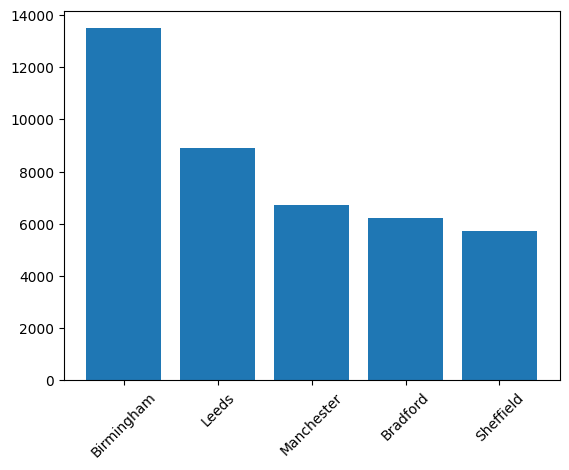

In [16]:
topDis = data['District Area'].value_counts()

top5 = topDis.sort_values(ascending= False).head(5)

plt.bar(x= top5.index, height = top5)
plt.xticks(rotation= 45)
plt.show()

<h3>INSIGHT 8</h3>

<p>Birmingham definitely stands out with a much higher number of accidents with 13491 accidents compared to other districts like Leeds or Manchester</p>
<hr>

<h3>7. Which district records the highest average casualties per accident?</h3>

In [17]:
avgCasualties = data.groupby('District Area')['Number_of_Casualties'].mean()
topDis = avgCasualties.idxmax()
topCas= avgCasualties.max()
print(f'{topDis} - {topCas.round(2)}')

Blaeu Gwent - 1.69


<h3>INSIGHT 9</h3>

<p>Blaeu Gwent has the highest average casualties per accident with 1.69. This could mean that when accidents happen in Blaeu Gwent, they tend to be more severe or involve more people on average compared to other districts.</p>
<hr>

<h3>8. Urban vs Rural: Are fatal accidents more common in rural areas?</h3>

In [18]:
urbanOrRural = data[data['Accident_Severity'] == "Fatal"].groupby('Urban_or_Rural_Area').size()
urbanOrRural

Urban_or_Rural_Area
Rural          5601
Unallocated       0
Urban          3060
dtype: int64

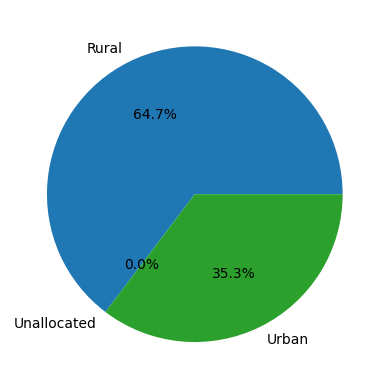

In [70]:
plt.pie(urbanOrRural, labels= urbanOrRural.index, autopct = "%1.1f%%")
plt.show()

<h3>INSIGHT 10</h3>

<p>It looks like fatal accidents are more common in rural areas than in urban areas with 5601 fatal accidents. This might be because rural roads often have fewer safety features like streetlights or divided lanes</p>
<hr>

<h3>9. Which district has the highest number of Wet or damp road accidents?</h3>

In [71]:
#data.groupby('District Area')['Road_Surface_Conditions'].size()
wetAccidents = data[data['Road_Surface_Conditions'] == "Wet or damp"].groupby('District Area').size()

mostWetAcc = wetAccidents.idxmax()
mostWetNum = wetAccidents.max()
print(f'{mostWetAcc} - {mostWetNum}')

Birmingham - 3701


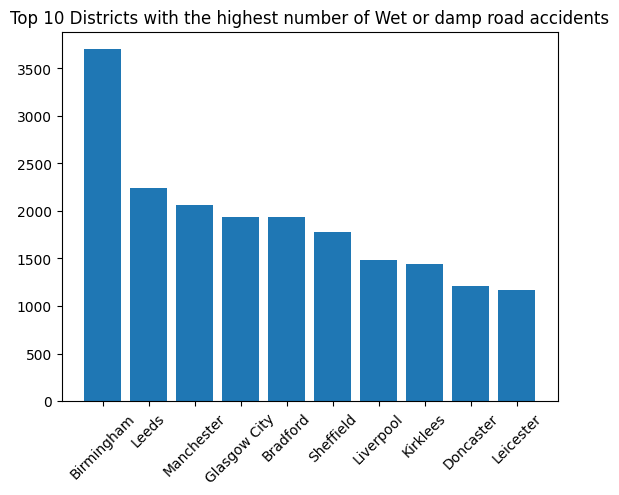

In [74]:
top5 = wetAccidents.sort_values(ascending= False).head(10)

plt.bar(x= top5.index, height = top5)
plt.xticks(rotation= 45)
plt.title('Top 10 Districts with the highest number of Wet or damp road accidents')
plt.show()

<h3>INSIGHT 11</h3>

<p>Birmingham has the highest number of accidents on wet or damp roads, with a total of 3701</p>
<hr>

<h3>10. Which road surface condition has the highest accident rate?</h3>

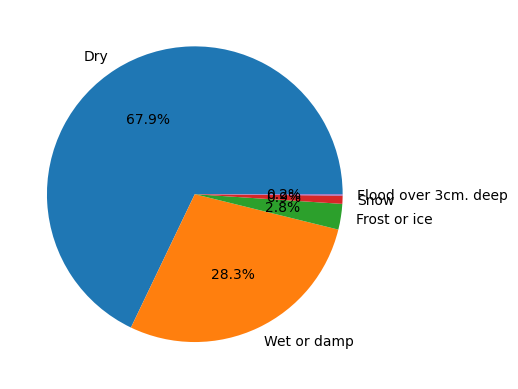

In [77]:
roadSur = data['Road_Surface_Conditions'].value_counts()

plt.pie(roadSur, labels= roadSur.index, autopct = "%1.1f%%")
plt.show()

<h3>INSIGHT 12</h3>

<p>dry road conditions have the highest accident rate, with 447821 accidents</p>
<hr>

<h3>11. How does weather condition affect average casualties?</h3>

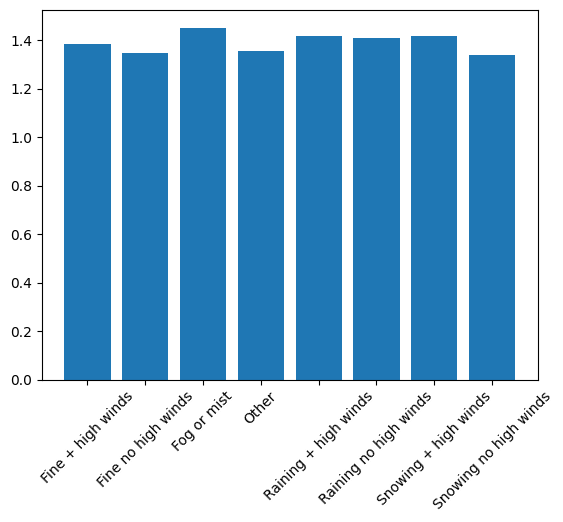

In [82]:
weather = data.groupby('Weather_Conditions')['Number_of_Casualties'].mean()

plt.bar(x = weather.index, height= weather)
plt.xticks(rotation= 45)
plt.show()

<h3>INSIGHT 13</h3>

<p>It looks like fog or mist has the highest average casualties, with an average of 1.45 casualties per accident. This makes sense because fog can really reduce visibility and make driving more dangerous.</p>
<hr>

<h3>12. Which weather + light condition combination is the riskiest?</h3>

In [22]:
riskiestDf = data.groupby(['Weather_Conditions', 'Light_Conditions'])['Number_of_Casualties'].mean().unstack()
riskiestDf

Light_Conditions,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Weather_Conditions,,,,,
Fine + high winds,1.389831,1.373110,1.470588,1.523869,1.370428
Fine no high winds,1.307144,1.364376,1.321490,1.557324,1.331161
Fog or mist,1.369231,1.436482,1.297297,1.469838,1.460134
Other,1.258065,1.360608,1.237762,1.474674,1.332871
Raining + high winds,1.324324,1.364971,1.575342,1.527056,1.416633
Raining no high winds,1.301127,1.392526,1.350763,1.536405,1.401230
Snowing + high winds,1.400000,1.468880,1.400000,1.444444,1.381898
Snowing no high winds,1.265957,1.318928,1.233333,1.392109,1.345036


In [23]:
riskiestWeather = riskiestDf.mean().idxmax()
avg = riskiestDf.mean().max()

print(f'Riskiest Combination is {riskiestWeather} wiht an average casualties of {avg}')

Riskiest Combination is Darkness - no lighting wiht an average casualties of 1.4907147666912353


<h3>INSIGHT 14</h3>

<p>the riskiest combo is darkness with no lighting, resulting in an average of about 1.49 casualties per accident. That makes sense, since it's hard to see in those conditions, and drivers probably have a much harder time reacting to hazards.</p>
<hr>

<h3>13. Which vehicle type is most frequently involved in accidents?</h3>

In [90]:
data['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

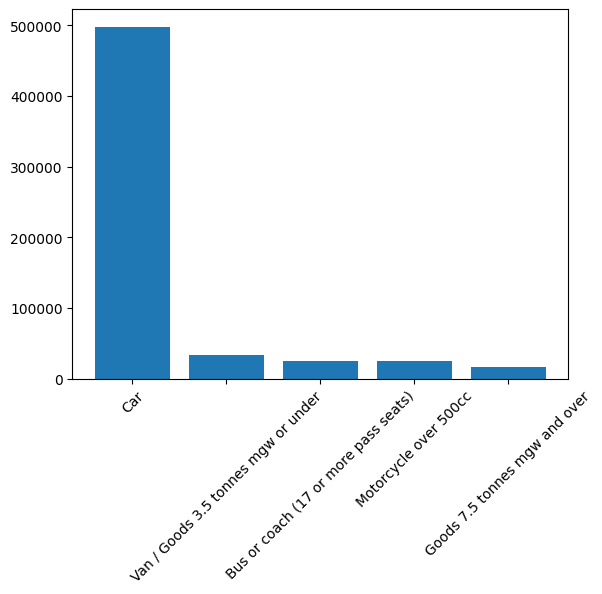

In [89]:
vehicle = data['Vehicle_Type'].value_counts().head(5)
plt.bar(x = vehicle.index, height= vehicle)
plt.xticks(rotation= 45)
plt.show()

<h3>INSIGHT 15</h3>

<p>Cars are by far the most common type of vehicle involved in accidents, with 497992 acccidents</p>
<hr>

<h3>14. Which vehicle type is most likely to crash in darkness with completely no lighting?</h3>

In [25]:
data[data['Light_Conditions'] == 'Darkness - no lighting'].groupby('Vehicle_Type').size()

Vehicle_Type
Agricultural vehicle                       113
Bus or coach (17 or more pass seats)      1427
Car                                      28385
Data missing or out of range                 0
Goods 7.5 tonnes mgw and over              963
Goods over 3.5t. and under 7.5t            367
Minibus (8 - 16 passenger seats)           121
Motorcycle 125cc and under                 794
Motorcycle 50cc and under                  424
Motorcycle over 125cc and up to 500cc      447
Motorcycle over 500cc                     1428
Other vehicle                              299
Pedal cycle                                  8
Ridden horse                                 0
Taxi/Private hire car                      704
Van / Goods 3.5 tonnes mgw or under       1957
dtype: int64

<h3>INSIGHT 16</h3>

<p>Cars are the most likely to crash in complete darkness, with 28385 accidents. PRobaly because cars have more populations in the road than other vehicle type.</p>
<hr>

<h3>15. Do fatal accidents occur at higher or lower latitudes (north vs south UK)?</h3>

In [26]:
 data[data['Accident_Severity'] == 'Fatal']['Latitude'].mean()

52.695999636762494

In [27]:
 data[data['Accident_Severity'] != 'Fatal']['Latitude'].mean()

52.55197774345345

<h3>INSIGHT 17</h3>

<p>This suggests that fatal accidents might be slightly more common in the southern parts of the UK, but the difference is pretty smalld</p>
<hr>

<h3>16. Do motorcycle accidents increase casualty count more in rural or urban areas?</h3>

In [28]:
data[(data['Vehicle_Type'] == 'Motorcycle over 125cc and up to 500cc') | 
    (data['Vehicle_Type'] == 'Motorcycle over 500cc')].groupby('Urban_or_Rural_Area').size()

Urban_or_Rural_Area
Rural          11631
Unallocated        0
Urban          21682
dtype: int64

<h3>INSIGHT 18</h3>

<p>Motorcycle accidents are more frequent in urban areas, with 21682 accidents compared to 11631 in rural areas.</p>
<hr>

<h3>17. Which area has more accident? (Urban/Rural)</h3>

In [29]:
data['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h3>INSIGHT 19</h3>

<p>there are 238990 accidents in rural areas and 421663 accidents in urban areas.</p>
<hr>

<h3>18. Which districts report the highest share of icy/frost accidents?</h3>

In [30]:
highestIcyAcc = data[data['Road_Surface_Conditions'] == "Frost or ice"].groupby('District Area').size()

highestDis = highestIcyAcc.idxmax()
highestNum = highestIcyAcc.max()
print(f'{highestDis} - {highestNum}')

Birmingham - 306


<h3>INSIGHT 20</h3>

<p>Birmingham reports the highest share of icy/frost accidents, with 306 incidents.</p>
<hr>

<h3>19. Are multi-vehicle accidents in wet weather more likely to be serious than in dry weather?</h3>

In [31]:
multiVehicleAcc = data.groupby(data['Number_of_Vehicles'] >= 2)['Road_Surface_Conditions'].value_counts().unstack()
multiVehicleAcc[['Dry', 'Wet or damp']]
#TRUE means multi-vehicle

Road_Surface_Conditions,Dry,Wet or damp
Number_of_Vehicles,,
False,129730,59265
True,318817,127443


<h3>INSIGHT 21</h3>

<p>There are 127,443 multi-vehicle accidents in wet or damp conditions and 318,327 in dry conditions. So it's clear that multi-vehicle accidents occur frequently in dry area than in wet or damp</p>
<hr>

<h3>20. Is there a correlation between number of vehicles and number of casualties?</h3>

In [32]:
data['Number_of_Vehicles'].corr(data['Number_of_Casualties'])

0.22888886126927557

<h3>INSIGHT 22</h3>

<p>There's a slight correlation of about 0.23 between the number of vehicles involved in an accident and the number of casualties. This suggests thta there is a tendency for the number of casualties to increase as the number of vehicles involved increases.</p>
<hr>

<h3>21. Are weekends more likely to have serious or fatal accidents compared to weekdays?</h3>

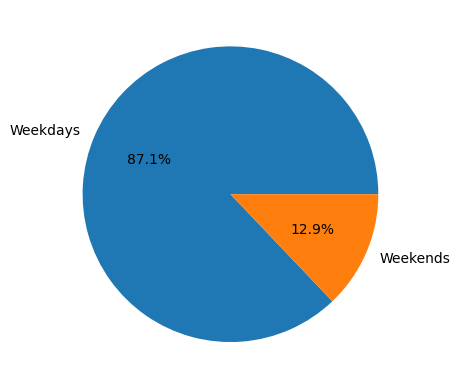

In [93]:
data['Weekend'] = data['DaysOfWeek'] >= 5  
weekends = data[data['Accident_Severity'] == 'Fatal'].groupby('Weekend').size()

labels = ['Weekdays', 'Weekends']

plt.pie(weekends, labels= labels, autopct = "%1.1f%%")
plt.show()

<h3>INSIGHT 23</h3>

<p>There are more fatal accidents on weekdays with 7544 than on weekends with 1117.</p>
<hr>

<h3>INSIGHT 24</h3>

<p>Weekdays generally have higher traffic volume due to commuting, which could explain the higher number of fatal accidents.</p>
<hr>

<h3>22. Do fatal accidents occur more frequently in winter vs summer months?</h3>

In [54]:
Winter = data["Winter"] = data["Month"].isin([12, 1, 2])
Summer = data['Summer'] = data["Month"].between(6, 8)

In [64]:
data[data['Accident_Severity'] == 'Fatal'].groupby(Winter).size()

Month
False    7827
True      834
dtype: int64

In [66]:
data[data['Accident_Severity'] == 'Fatal'].groupby(Summer).size()

Month
False    7794
True      867
dtype: int64

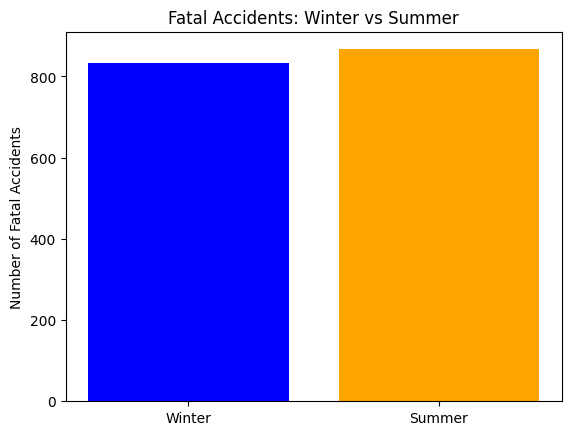

In [95]:
seasons = ['Winter', 'Summer']
fatal_counts = [834, 867]

plt.bar(seasons, fatal_counts, color=['blue', 'orange'])
plt.title("Fatal Accidents: Winter vs Summer")
plt.ylabel("Number of Fatal Accidents")
plt.show()

<h3>INSIGHT 25</h3>

<p>Looking at these data, there's a slightly higher fatal accidents in Summer with 867 than in Winter with 834</p>
<hr>